<a href="https://colab.research.google.com/github/aavani-p-vas/Unsupervised-Learning/blob/main/Unsupervised_casestudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('/content/force2020_data.csv')

In [4]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [6]:
df.dtypes

,0
RHOB,float64
GR,float64
DEPTH_MD,float64
NPHI,float64
PEF,float64
DTC,float64


In [7]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


Filling Null Values

In [10]:
df['NPHI'].fillna(df['NPHI'].mode()[0], inplace=True)
df['PEF'].fillna(df['PEF'].mode()[0], inplace=True)
df['DTC'].fillna(df['DTC'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,0
PEF,0
DTC,0


Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[df.columns] = scaler.fit_transform(df[df.columns])
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.571087,-1.731721,-0.666566,6.977850,1.174713
1,-0.741163,0.538331,-1.731532,-0.666566,6.373504,1.157459
2,-0.718560,0.383248,-1.731342,-0.666566,7.638825,1.143404
3,-0.734045,0.315393,-1.731152,-0.666566,11.424879,1.142613
4,-0.773944,0.275241,-1.730963,-0.666566,13.910843,1.141924


Outlier detection

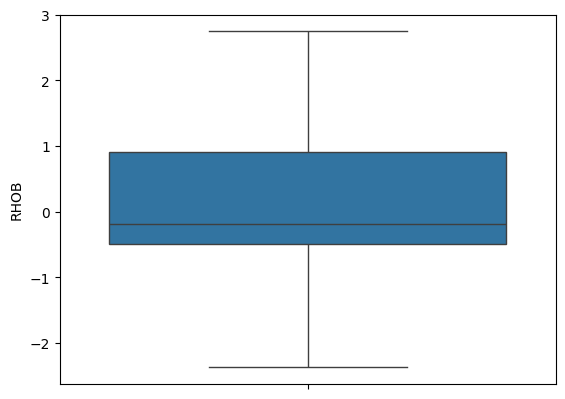

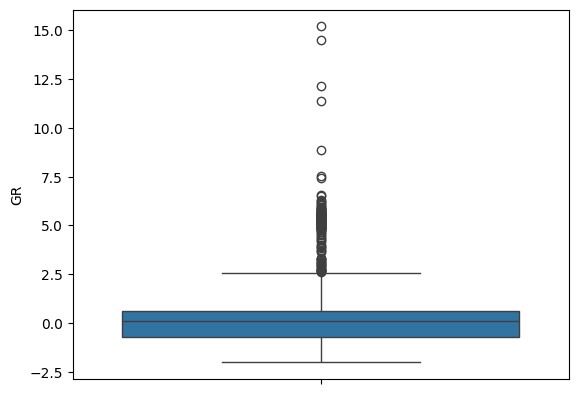

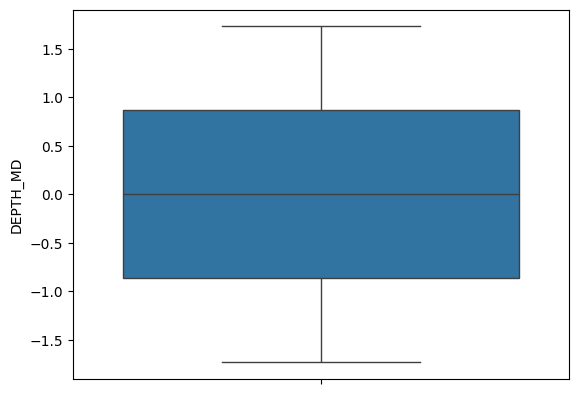

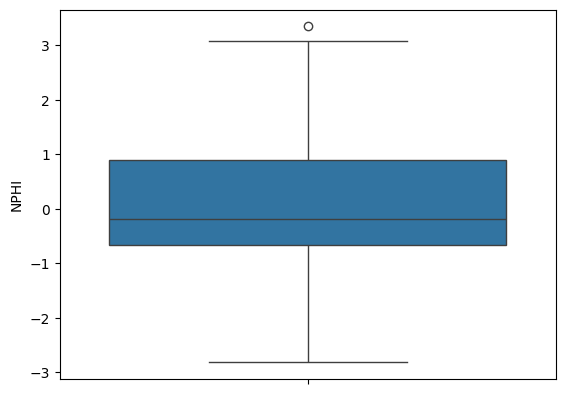

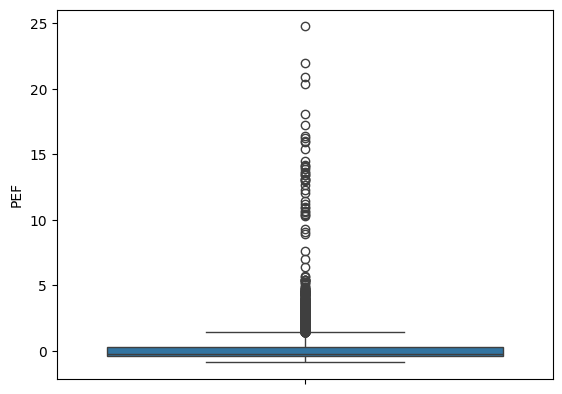

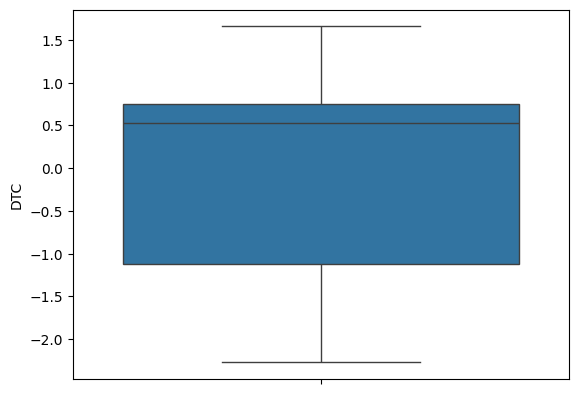

In [14]:
for col in df.columns:
  sns.boxplot(df[col])
  plt.show()

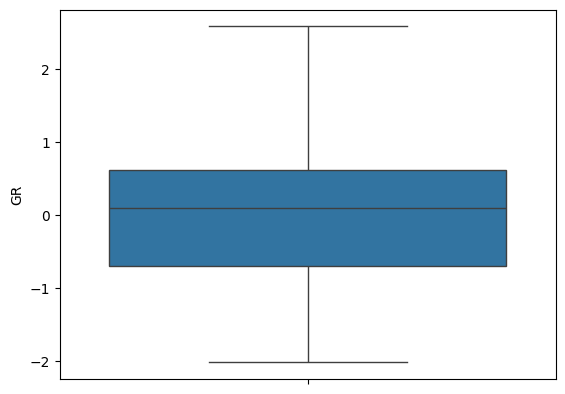

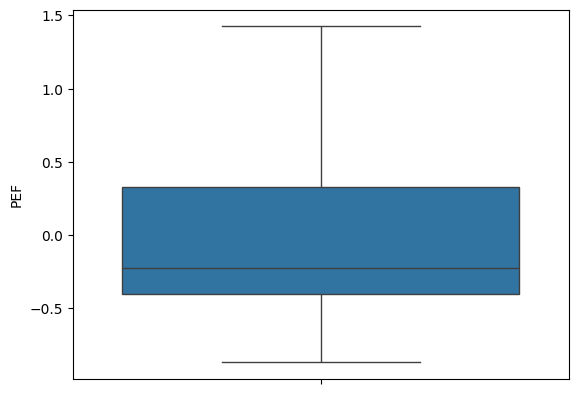

In [18]:
feature_cols =['GR','PEF']
for col in feature_cols:
  Q1 = df[col].quantile(0.25)
  Q2 = df[col].quantile(0.50)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lb = Q1 - 1.5*IQR
  ub = Q3 + 1.5*IQR
  df[col] = df[col].clip(lb,ub)
for col in feature_cols:
  sns.boxplot(df[col])
  plt.show()

In [42]:
from sklearn.cluster import KMeans

wcss = []
cluster_range = range(1, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)




Dendrogram






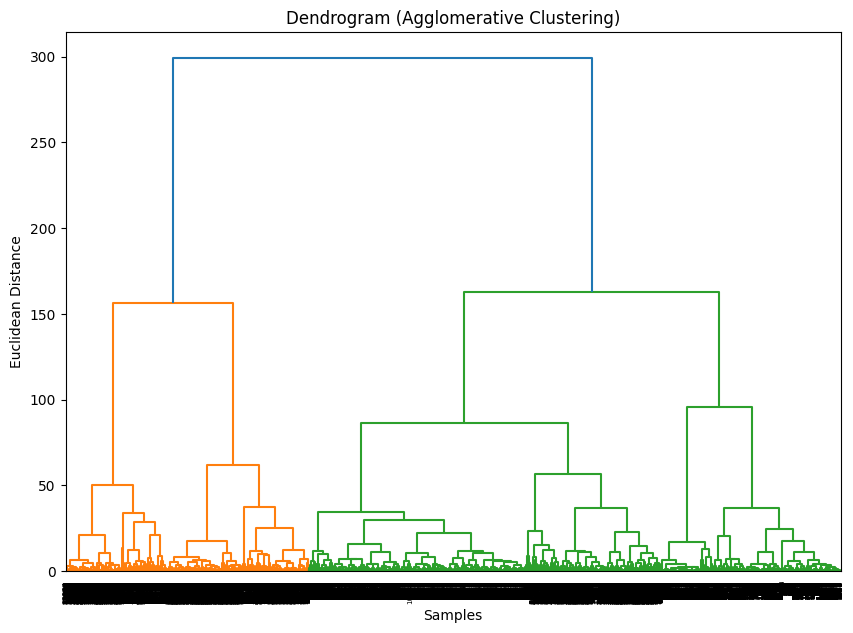

In [27]:
import scipy.cluster.hierarchy as sch

# Create a Dendrogram for Agglomerative Clustering
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(df, method='ward'))
plt.title('Dendrogram (Agglomerative Clustering)')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

Elbow Curve

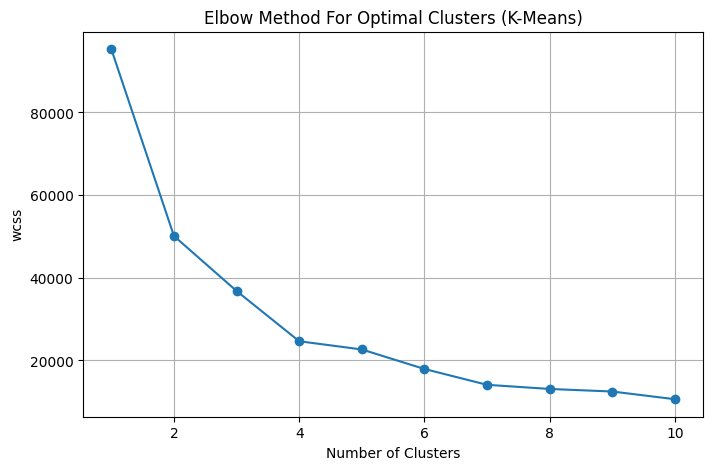

In [43]:
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method For Optimal Clusters (K-Means)')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.grid(True)
plt.show()

In [24]:
pred_clusters = kmeans.predict(df)
pred_clusters

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [30]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,-0.759999,0.571087,-1.731721,-0.666566,1.425378,1.174713
1,-0.741163,0.538331,-1.731532,-0.666566,1.425378,1.157459
2,-0.718560,0.383248,-1.731342,-0.666566,1.425378,1.143404
3,-0.734045,0.315393,-1.731152,-0.666566,1.425378,1.142613
4,-0.773944,0.275241,-1.730963,-0.666566,1.425378,1.141924
...,...,...,...,...,...,...
18265,1.745819,-1.551518,1.731081,-1.522065,-0.858397,0.713980
18266,1.789158,-1.480786,1.731271,-1.539847,-0.858397,0.713980
18267,1.917421,-1.438792,1.731461,-1.615392,-0.858397,0.713980
18268,2.109002,-1.452527,1.731650,-1.626973,-0.858397,0.713980


Text(0, 0.5, 'DTC')

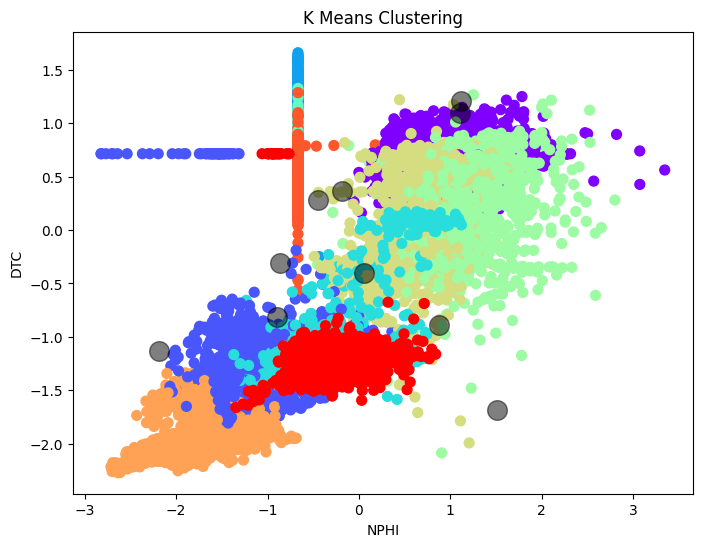

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(df['NPHI'],df['DTC'],c=pred_clusters,cmap='rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=200,alpha=0.5)
plt.title('K Means Clustering')
plt.xlabel('NPHI')
plt.ylabel('DTC')

Agglomerative clustering

In [32]:
df.shape

(18270, 6)

In [37]:
from sklearn.cluster import AgglomerativeClustering
agglo_clustering = AgglomerativeClustering(metric='euclidean', linkage='ward')
y_agglo = agglo_clustering.fit_predict(df)

Text(0, 0.5, 'DTC')

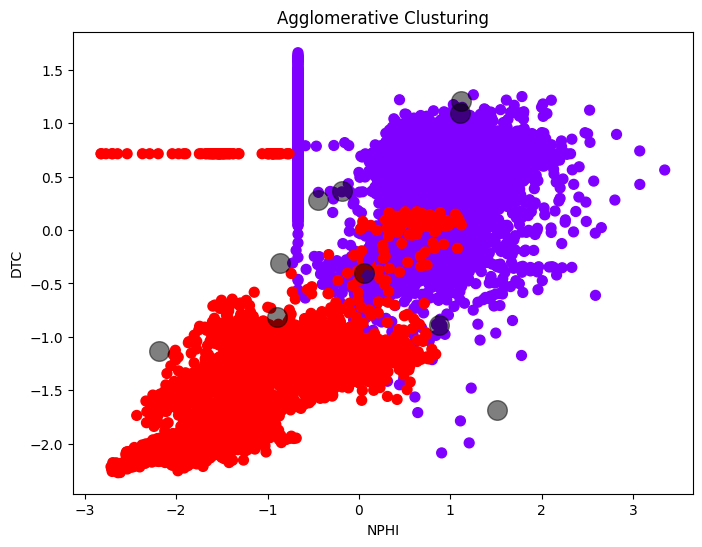

In [40]:
plt.figure(figsize=(8,6))
plt.scatter(df['NPHI'],df['DTC'],c=y_agglo,cmap='rainbow',s=50)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],c='black',s=200,alpha=0.5)
plt.title('Agglomerative Clusturing')
plt.xlabel('NPHI')
plt.ylabel('DTC')